<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-results" data-toc-modified-id="Plot-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot results</a></span></li></ul></div>

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

## Plot results



In [19]:
def plot_exp(exp):
    # load the vars from exp
    temps, N, therm_sweeps, measure_sweeps =  [exp[x] for x in
        ['temps', 'N', 'therm_sweeps', 'measure_sweeps']
    ]
    energies, heat, magn, susc = [exp[x] for x in
        ['energies', 'heat', 'magn', 'susc']
    ]
    
    fig, axs = plt.subplots(1,2, figsize=(10,4))

    fig.suptitle(
        ('Ising with conv2d.\n'
         f'{N=}, {therm_sweeps=}, {measure_sweeps=}\n '
        )
        #, y=1.00
        , fontsize=13
    )

    plt.sca(axs[0])
    plt.errorbar(temps, energies/N**2
                 , yerr=heat/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, heat/temps, 'red', label='Specific heat')
    plt.legend(loc='upper left')

    plt.sca(axs[1])
    #plt.plot(temps, magnetizations/N**2)
    plt.errorbar(temps, magn/N**2
                 , yerr=susc/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, susc/temps/N**2, 'red', label='M. Susceptibility')

    plt.legend(loc='best')

    [ax.grid() for ax in axs]
    [ax.set_title(x) for ax,x in zip(axs, ['Energy', 'Magnetization'])]
    [ax.set_xlabel('kT') for ax in axs]
    plt.subplots_adjust(top=0.80)


In [101]:
N, sweep = 100, 2000
filename = f'../data/exp_N{N}_sweep{sweep}.npy'

In [102]:
exp = np.load(filename, allow_pickle=True)
exp = exp.item()

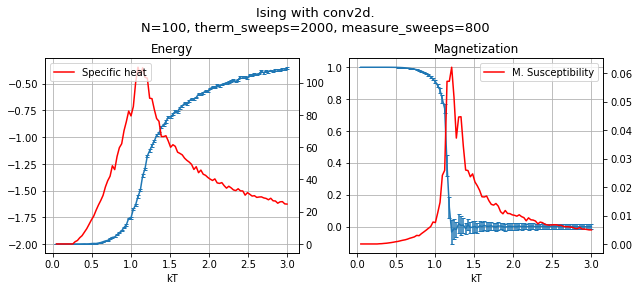

In [103]:
plot_exp(exp)
N = exp['N']
sweeps = exp['therm_sweeps']

In [79]:
plt.savefig(f'../data/figures/Ising_conv2d_N{N}_{sweeps}sweeps.png')

<Figure size 432x288 with 0 Axes>

In [80]:
temps, energies, heat, magn, susc = [exp[x] for x in
    ['temps', 'energies', 'heat', 'magn', 'susc']
]
heat = heat/temps
susc = susc/temps


In [81]:
def to_reduced_temps(temps, t_c):
    red_temps = (temps - t_c)/t_c
    return red_temps 

def estimate_t_c(temps, x):
    t_c = temps[np.argmax(x)]
    return t_c

tc_heat = estimate_t_c(temps, heat)
tc_susc = estimate_t_c(temps, susc)
tc_theory = 2.269*exp['J']

print(f'Heat tc: {tc_heat}')
print(f'Susc tc: {tc_susc}')
print('Theory T_c', tc_theory)

Heat tc: 1.1227272727272728
Susc tc: 1.1525252525252525
Theory T_c 1.1345


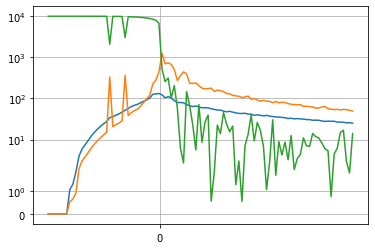

In [89]:
red_t = to_reduced_temps(temps, tc_theory)

plt.plot(red_t, np.abs(heat))
plt.plot(red_t, np.abs(susc))
plt.plot(red_t, np.abs(magn))
plt.yscale('symlog')
plt.xscale('symlog')
plt.grid()



<ipython-input-97-88b492af5648>:1: RuntimeWarning: divide by zero encountered in log
  df_h = np.log(np.abs(heat))/np.log(np.abs(red_t))
<ipython-input-97-88b492af5648>:2: RuntimeWarning: divide by zero encountered in log
  df_s = np.log(np.abs(susc))/np.log(np.abs(red_t))


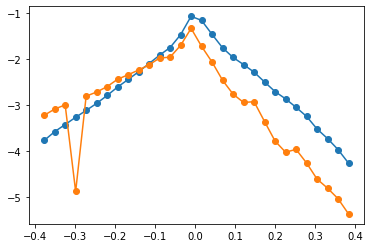

In [97]:
df_h = np.log(np.abs(heat))/np.log(np.abs(red_t))
df_s = np.log(np.abs(susc))/np.log(np.abs(red_t))

around_tc = np.abs(red_t)<.4
df_h_crit = df_h[around_tc]
df_s_crit = df_s[around_tc]
red_t_crit = red_t[around_tc]
plt.plot(red_t_crit, df_h_crit, 'o-')
plt.plot(red_t_crit, df_s_crit, 'o-')


In [100]:
sorted(zip(red_t_crit, df_s_crit), key=lambda x: abs(x[0]))

[(-0.010377018310028442, -1.3326129647192202),
 (0.01588827899978179, -1.7244989140215157),
 (-0.036642315619838675, -1.7025091694527472),
 (0.042153576309592225, -2.066099703772263),
 (-0.06290761292964911, -1.9578977720092514),
 (0.06841887361940245, -2.4610394235084456),
 (-0.08917291023945934, -1.9778677599483399),
 (0.09468417092921289, -2.762823267032741),
 (-0.11543820754926977, -2.124160934629367),
 (0.12094946823902313, -2.943410522317137),
 (-0.14170350485908, -2.2383018914003356),
 (0.14721476554883337, -2.9268528024358953),
 (-0.16796880216889035, -2.3405489626237017),
 (0.17348006285864379, -3.358762615901247),
 (-0.19423409947870057, -2.4384671599905894),
 (0.199745360168454, -3.7825316803512004),
 (-0.2204993967885109, -2.5985832813268903),
 (0.22601065747826446, -4.024922338300358),
 (-0.24676469409832125, -2.716560460352902),
 (0.2522759547880747, -3.9636080674476672),
 (-0.27302999140813156, -2.8064384770171587),
 (0.27854125209788494, -4.259544747423537),
 (-0.299295